<h1>Anomaly Detection thanks to <i>Unsupervised Learning</i></h1>
<br>
<img src='images/0.jpg'>

We are going to some train models that will be either able to reproduce the probability density function of a specific data-generating process or to identify whether a given new sample is an <i><b>inlier</b></i> or an <i><b>outlier</i></b>. What these models aim to do is finding and returning anomalies. These anomalies are samples that are below or under a predefined threshold, this threshold is given by a probability distribution $p(x) << \lambda$ where $\lambda$ is the predefined threshold or quite far from the centroid of the main distribution.
<br>
<br>
In this notebook we are going to develop and understand the next parts:
<ul>
    <li>Saying hello to Probability Density Functions.</li>
    <li>Histograms are not enought, but why?</li>
    <li>Kernel Density Estimation (KDE).</li>
    <li>Selection criteria with Bandwidth.</li>
    <li>Univariate Anomaly Detection.</li>
    <li>Anomaly Detection with HTTP attacks.</li>
    <li>One-class support vector machines.</li>
    <li>Isolation Forests for Anomaly Detection.</li>
</ul>
<br>
Let's start learning! First's we are going to define some vocabulary for simplicity and understand better the topics of Probability Densities:
<ul>
    <li>$P(X)$ means <i>Probability of $x$</i>.</li>
    <li>$p(x)$ means <i>Density of $x$</i>.</li>
    <li>$m = min(X)$, it is the minimum value of the set $X$.</li>
    <li>$M = max(X)$, it is the maximum value of the set $X$.</li>
</ul>

<h2>Saying Hello to Probability Density Functions</h2>
<br>
The Probability Density function provides a very helpful measure of understanding how much a sample is more likely than another one.
<br>
<br>

<br>
The next example will help us to better understand probability densities;  let's imagine that we are working with a dataset that has a Gaussian distribution $N(0, 100)$, the density $p(25) = 0.4$ and the $p(75) = 0.009$. What we can understand of these two density  probabilities is that the sample with the value of $25$ is $44$ times more likely than a sample with a value of $75$. We know that the sample with the value of $25$ is $44$ times more likely than the sample with the value of $75$, because of the result from dividing the probabilities densities:
<br>
<br>
<div style='text-align:center;font-size:22px;'>
$\frac{p(25)}{p(75)} = \frac{0.4}{0.009} = 44$
</div>
<br>
This allows us to set an acceptance threshold $\alpha$ and that defines all the samples $x \in X$ whose $p(x_i) < \alpha$ as anomalies, using the example above the probability of the value $75$ is of $0.9\%$, if we define a threshold of  $1%$ for $\alpha$, as the probability for $75$ is $0.09\%$ is smaller than the thershold for $\alpha$ of $1\%$, this means that $75$ will be categorized as an outlier therefore is an anomaly sample. The choice of a threshold defined by probability density is a crucial step in the anomaly detection process and it must include also the potential outliers which, however, are still regular samples, <i>but what about the inliers?</i> This will be answered later.
<br>
<h3>Outliers, Novelties and Inliers: <i>Anomalies, rare data samples!</i></h3>
<br>
We start the process of detecting anomalies with the assumption of: <i>"Common events are normal, while unlikely events are generally treated as anomalies."</i>, when we try to automatically identify outliers we can do it by relying on the properties of the whole dataset to discover the similarites and point up the distinctiveness, this characteristics of the dataset are dependent of the probability density of the dataset and its samples.
<br>
<br>
The structure of the densities can be very complex, with several high-probability regions surrounded by low-probability ones. That's why more generic approaches must be employed to model the whole dataset space.
<br>
<br>
When we are dealing with anomaly detection there is not a standard to follow to detect outliers or <i>novelties</i>, it always depends on the specific problem that is being analyzed. Due this reason, there is a common way to define the concept of anomalies, this way determines the how to make the distinction between outliers and novelties.
<br>
<br>
An outlier is a sample that is present in the dataset and the distance between it and the other samples is larger than the average, it has a lower density than must of the other data samples.
<br>
<br>
<b>What is a <i>novelty sample</i>?</b> A novelty sample is when we are interested in detecting whether a <b><i>new</i></b> observation is an outlier. In this context an outlier is also called a novelty.
<br>
<br>
<b><i>Inliers</i>, what are they?</b> These are data points that are in the "interior" of the distribution, where most of the other data are. Hence, it is not detected by tests that look for data that is an "aberation" from the other data points. (In some cases we can detect "inliers" that seem to be in the interior of a distribution, but are actually "outliers" when taken with respect to a more complex representation of the distribution. In this case the point is actually an outlier, but it only looks like it is in the interior of the distribution when we are using a crude distributional approximation.)
<br>
<br>
Inliers are known via external information to be subject to measurement error. In this case we would generally remove all the data known to be erroneous, even if some of it is an inlier, that is in the interior of the distribution where we would expect it to be. The different concepts of outliers and inliers tell us that a data point can be erroneous even if it is not in the tails of the distribution.
<br>
<h3>The Dataset and <i>its structure</i></h3>
<br>
Let's do some more thinking... Yes! a dataset that presents outliers can be an unbalanced dataset if the outliers are according to the dependent variable, if they are in a labeled dataset, they will be the samples with the smaller distribution of labels, but if we are trying to find out outliers and inliers samples from unlabeled dataset, we do it by applying techniques of dimensionality reduction, by defining a threshold according a specific feature or with Neural Networks. For the exercises that we are going to develop in this notebook we assume to have very unbalanced dataset by following the next assumptions:
<ul>
    <li>For $N_{X}$ the number of samples in the set $X$ and $N_{X_{O}}$ the number of outliers in set $X$, the next 
        assumption must exist  $N_{X_{O}} << N_{X}$, what this means is; that the number of outliers in set $X$ is way less 
        than the number of data samples in set $X$.</li>
    <li>$P(N_{X_{O}}) \to 0$  if there is a novelty detection (that is, we can generally trust the existing samples and focus 
        our attention on the new ones).</li>
</ul>
<h3>Some Tips</h3>
<ul>
    <li>Any large deviation from the high-probability region can be enough to trigger an alarm.</i>
    <li>The most important factors are the number of samples and the context from where they are collected. It goes without 
    saying that any model must be trained with the same kind of elements that are going to be tested.</li>
    <li>Before performing an analysis, it is strongly suggested to double-check the nature of the data and ask whether all the 
    test samples have been drawn from the same data-generating process.</li>
</ul>
<br>
We have learned and understood the concepts of outliers, novelties and inliers, now we can move to the next part of this notebook  <b>Histograms are not enought, but why?</b>, there we will learned what histograms are, how can they help us in detecting outliers, novelties and inliers, and why they are not a sufficient technique for the detection of rare samples.

<h2>Histograms are not enought, <i>but why?</i></h2>
<br>
An Histogram is the easiest way to estimate the distribution of a dataset containing observations, it is based on a frequency count.
<br>
<br>
The interval $(m, M)$ is splitted into a fixed number $b$ of bins, these bins can have either the same or different widths denoted as $w(b_j)$, therefor $n_{p}(b_j)$ corresponds to the number of samples included into the bin $b_j$. When, given a test sample $x_t$, it's easy to understand that the approximation of the probability can be easily obtained by detecting the bin containing $x_t$ and using the following formula:
<br>
<br>
<div style='text-align:center; font-size:22px;'>
    $p(x_t) \approx \frac{1}{n} \frac{n_{p}(b_{t})}{w(b_{t})}$
</div>
<br>
Let's make a simple example based on the distribution of the <code>ages</code> of people subdivided into $10$ different classes:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1000)

nb_samples = [1000, 800, 500, 380, 280, 150, 120, 100, 50, 30]

ages = []

for n in nb_samples:
    i = np.random.uniform(10, 80, size=2)
    a = np.random.uniform(i[0], i[1], size=n).astype(np.int32)
    ages.append(a)

ages = np.concatenate(ages)

c:\users\kleye\anaconda3\envs\ai\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<b>Note:</b> <i>This data, was generated from the same process</i>
<br>
<br>
The dataset that we generated is hold in the <code>ages</code> array, we are going to create a histogram to have an initial insight into the distribution, this histogram will be done with <code>np.histrogram()</code> function.
<br>
<br>
When we create a histogram the first problem to solve is finding out the optimal number of bins. If we were dealing with a dataset that has a standard distributions is easier to find out the optimal number of bins,  but it can become extremely difficult when there is no prior knowledge about the probability density, it is difficult because we must have to approximate a continuos function with a stepwise one this due that the width of the bins determines the final accuracy.
<br>
<br>
An example: if we were dealing with a dataset with an uniform distribution, the density would be flat, having a few bins would be enough to achieve a good result, but if the dataset had a non uniform distribution, the peaks, we would have to place more (shorter) bins in the areas when the first derivative of the function is large and a smaller number when the derivative is close to zero (indicating a flat region). Histograms are generally based on rough computations for calculating the optimal number of bins. Thanks that <code>NumPy</code> allows setting the <code>bins='auto'</code> parameter, the optimal number of bins is auto-selected based on a well-defined statistical method (based on the Freedman Diaconis Estimator and the Sturges formula):
<br>
<br>
<div style='text-align:center; font-size:22px;'>
    $n_{bins} =max \Bigl(1 + log_{2}m, \frac{2IQR}{\sqrt[3]{m}}\Bigr)$
</div>
<br>
<b>IQR it means the Interquartile Range</b> and is the difference between the $75^{th}$ and $25^{th}$ percentiles.
<br>
<br>
As we don't have an idea of the distribution of the <code>ages</code> dataset, it is better to rely on the automatic selection of the optimal number of bins, this is done as shown in the following snippet:

In [7]:
# h for histograms counts and e for the bin edges
h, e = np.histogram(ages, bins='auto')

print('Histograms Counts: {}'.format(h))
print('Bin Edges: {}'.format(e))

Histograms counts: [177  86 122 165 236 266 262 173 269 258 241 116 458 257 311   1   1   5
   6]
Bin edges: [16.         18.73684211 21.47368421 24.21052632 26.94736842 29.68421053
 32.42105263 35.15789474 37.89473684 40.63157895 43.36842105 46.10526316
 48.84210526 51.57894737 54.31578947 57.05263158 59.78947368 62.52631579
 65.26315789 68.        ]


The algorithm has defined $19$ bins.
<br>
<br>
<code>np.histogram()</code> has output the frequency counts and the edges, the edges are the minimum value of $16$ and the maximum value of $68$. Let's plot the distribution of the dataset:

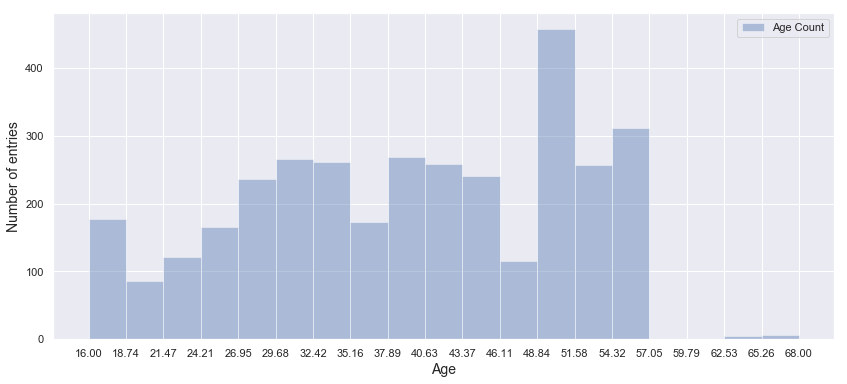

In [18]:
# Show the histogram
sns.set()

fig, ax = plt.subplots(figsize=(14, 6))

sns.distplot(ages, kde=False, ax=ax, label='Age Count')

ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Number of entries', fontsize=14)

ax.set_xticks(e)

ax.legend()

plt.show()

Let's see its probability distribution:

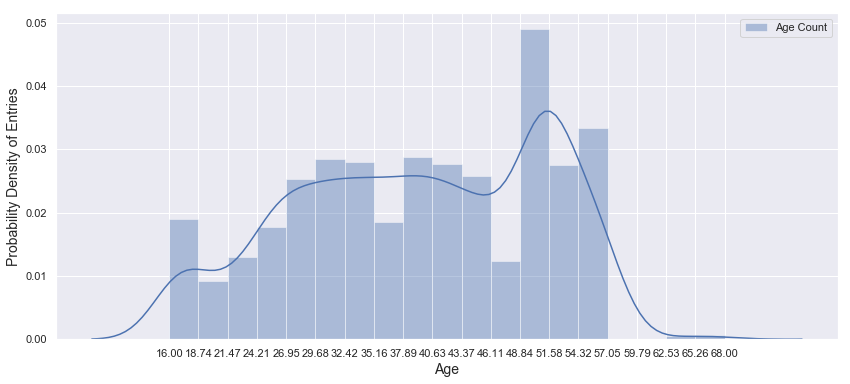

In [19]:
sns.set()

fig, ax = plt.subplots(figsize=(14, 6))

sns.distplot(ages, kde=True, ax=ax, label='Age Count')

ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Probability Density of Entries', fontsize=14)

ax.set_xticks(e)

ax.legend()

plt.show()

The plots are telling us that the distribution is irregular and some regions have peaks surrounded by flatter areas. <b>A histogram is helpful when the queries are based on the probability of a sample to belong to a specific bin.</b>
<br>
<br>
Let's try to determine the probability of a person that has an age between $26.95$ and $29.68$. That range of age is found in the 4th bin starting from 0). As all the bins have the same width, we can <i>approximate</i> such a value with the ratio between $n_{p}(b_{4})$ as <cpde>h[4]</code> and $m$ as <code>ages.shape[0]</code>, let's remember the formula:
<br>
<br>
<div style='text-align:center; font-size:22px;'>
    $p(x_t) \approx \frac{1}{n} \frac{n_{p}(b_{t})}{w(b_{t})}$
</div>
<br>

In [39]:
# Number of Samples in the Ages dataset
n = float(ages.shape[0])
# Number of samples included into the bin  
np_bt = float(h[4])
# Width of the bin
w_bt = e[1] - e[0]

# Probability of sample X
p_xt = np_bt/(n*w_bt)

print('P(26.95 < x < 29.68) = {:.3f} ({:.3f}%)'.format(p_xt, p_xt * 100.0))

P(26.95 < x < 29.68) = 0.025 (2.529%)


The approximation of the probability is about $2.529\%$, this is also confirmed thanks to the structure of the histogram.
<br>
<br>
<b>But the Histogram method has the next limitations:</b>
<ul>
    <li>The most obvious one is that the number and the widths of the bins. A small number, yields rough results that 
        can't take into account the fast oscillations.</li>
    <li>A very large number drives to a holed histogram, because most of the bins will have no samples, <i>the outliers.</i>
    </li>
</ul>

A more robust approach is needed, due to all the possible novalties that are encountered in real-life cases. In the next part of this notebook we will work on how to improve the robustness of decting outliers.

<h2>Kernel Density Estimation (KDE)</h2>